# CARS SPEED

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('../datasets/carsspeed.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  50 non-null     int64
 1   speed       50 non-null     int64
 2   dist        50 non-null     int64
dtypes: int64(3)
memory usage: 1.3 KB


,Unnamed: 0,speed,dist
0,1,4,2
1,2,4,10
2,3,7,4
3,4,7,22
4,5,8,16


In [3]:
x=df[['speed']]
y=df['dist']

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
np.shape(x)

(50, 1)

In [6]:
np.shape(y)

(50,)

In [7]:
model=LinearRegression()
model.fit(x,y)
score=model.score(x,y)*100
score

65.10793807582509

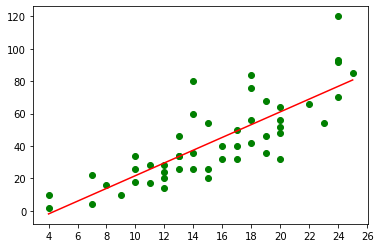

In [8]:
ypred=model.predict(x)
plt.scatter(x,y,c='green')
plt.plot(x,ypred,'r-')
plt.xticks(range(4,28,2))
plt.show()

In [9]:
from sklearn.preprocessing import PolynomialFeatures

In [10]:
pf=PolynomialFeatures(degree=10)
Px=pf.fit_transform(x)

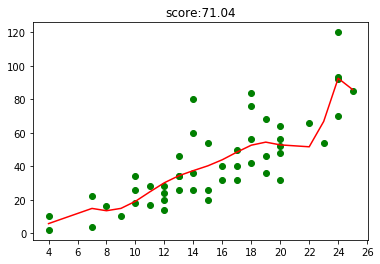

In [11]:
model=LinearRegression()
model.fit(Px,y)
score=model.score(Px,y)*100
ypred=model.predict(Px)
plt.scatter(x,y,c='green')
plt.plot(x,ypred,'r-')
plt.xticks(range(4,28,2))
plt.title(f'score:{score:.2f}')
plt.show()

In [12]:
nX=np.array([[13]])
pX_inp=pf.transform(nX)
model.predict(pX_inp)

array([34.34695897])

# HOUSE PRICING

In [13]:
df1=pd.read_csv('../datasets/house_pricing.csv')

In [28]:
df1.info()
df1.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814 entries, 0 to 813
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        814 non-null    object 
 1   Type        814 non-null    int64  
 2   Beds        814 non-null    int64  
 3   Baths       814 non-null    int64  
 4   SquareFeet  814 non-null    int64  
 5   Price       814 non-null    float64
dtypes: float64(1), int64(4), object(1)
memory usage: 38.3+ KB


,City,Type,Beds,Baths,SquareFeet,Price
0,SACRAMENTO,1,2,1,836,138159.85
1,SACRAMENTO,1,3,1,1167,167541.46
2,SACRAMENTO,1,2,1,796,119095.12
3,SACRAMENTO,1,2,1,852,130904.95
4,SACRAMENTO,1,2,1,797,120266.19
5,SACRAMENTO,2,3,1,1122,170847.39
6,SACRAMENTO,1,3,2,1104,159548.16
7,SACRAMENTO,1,3,1,1177,176531.14
8,RANCHO CORDOVA,2,2,2,941,146227.95
9,RIO LINDA,1,3,2,1146,196095.48


In [29]:
df1['Type'].unique()

array([1, 2, 3], dtype=int64)

In [16]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [17]:
df1['Type'].replace(['Residential', 'Condo', 'Multi-Family'], [1,2,3],inplace=True)

In [30]:
df1.head(5)

,City,Type,Beds,Baths,SquareFeet,Price
0,SACRAMENTO,1,2,1,836,138159.85
1,SACRAMENTO,1,3,1,1167,167541.46
2,SACRAMENTO,1,2,1,796,119095.12
3,SACRAMENTO,1,2,1,852,130904.95
4,SACRAMENTO,1,2,1,797,120266.19


In [38]:
x=df1[['Type','Beds','Baths','SquareFeet']]
y=df1['Price']

In [25]:
from sklearn.linear_model import LinearRegression

In [44]:
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=.2)

In [45]:
reg=LinearRegression()
reg.fit(xtrain,ytrain)
score=reg.score(xtest,ytest)*100
ypred=reg.predict(xtrain)
score

77.33941249325021

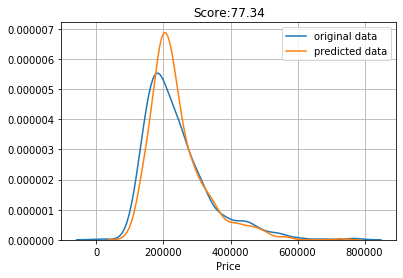

In [46]:
sns.distplot(ytrain,label='original data',hist=False)
sns.distplot(ypred,label='predicted data',hist=False)
plt.title(f'Score:{score:.2f}')
plt.legend()
plt.grid(True)